In [174]:
%matplotlib inline

# ANN with 2F

This code:
- Classifies astrophysical sources into two groups using two features and a neural network.
- Uses stratified repeated k-fold cross-validation to ensure robust evaluation.
- Collects accuracy, true positive rate, and true negative rate.
- Predicts class probabilities for unknown (unlabeled) sources (unids).
- Writes out those probabilities for downstream analysis.

Then
1. Loads unID object features and neural network prediction results.
2. Reshapes and organizes prediction probabilities by object.
3. Computes mean and standard deviation of predicted probabilities across multiple models.
4. Prepares for threshold-based classification of unIDs (based on p_cut).

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [176]:

XY_bal_log_Rel= np.genfromtxt('../data/XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print('Columns: ', XY_bal_log_Rel [0,:])

print('Shape of XY_bal_log_Rel_data: ', XY_bal_log_Rel_data.shape)


XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0

for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0

X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1]] # This selects only columns 0 and 1 (shape: (n, 2)), 
Y=XY_bal_log_Rel_data[:,4]
print('Shape of X_bal_log_Rel_data:', X_bal_log_Rel_data.shape)
print('Shape of Y: ', Y.shape)
print('10**XY_bal_log_Rel_data[:,2].min() ---- ', 10**XY_bal_log_Rel_data[:,2].min())
print('Y: ', Y)

Columns:  ['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
Shape of XY_bal_log_Rel_data:  (5662, 5)
Shape of X_bal_log_Rel_data: (5662, 2)
Shape of Y:  (5662,)
10**XY_bal_log_Rel_data[:,2].min() ----  4.056
Y:  [0. 0. 0. ... 1. 1. 1.]


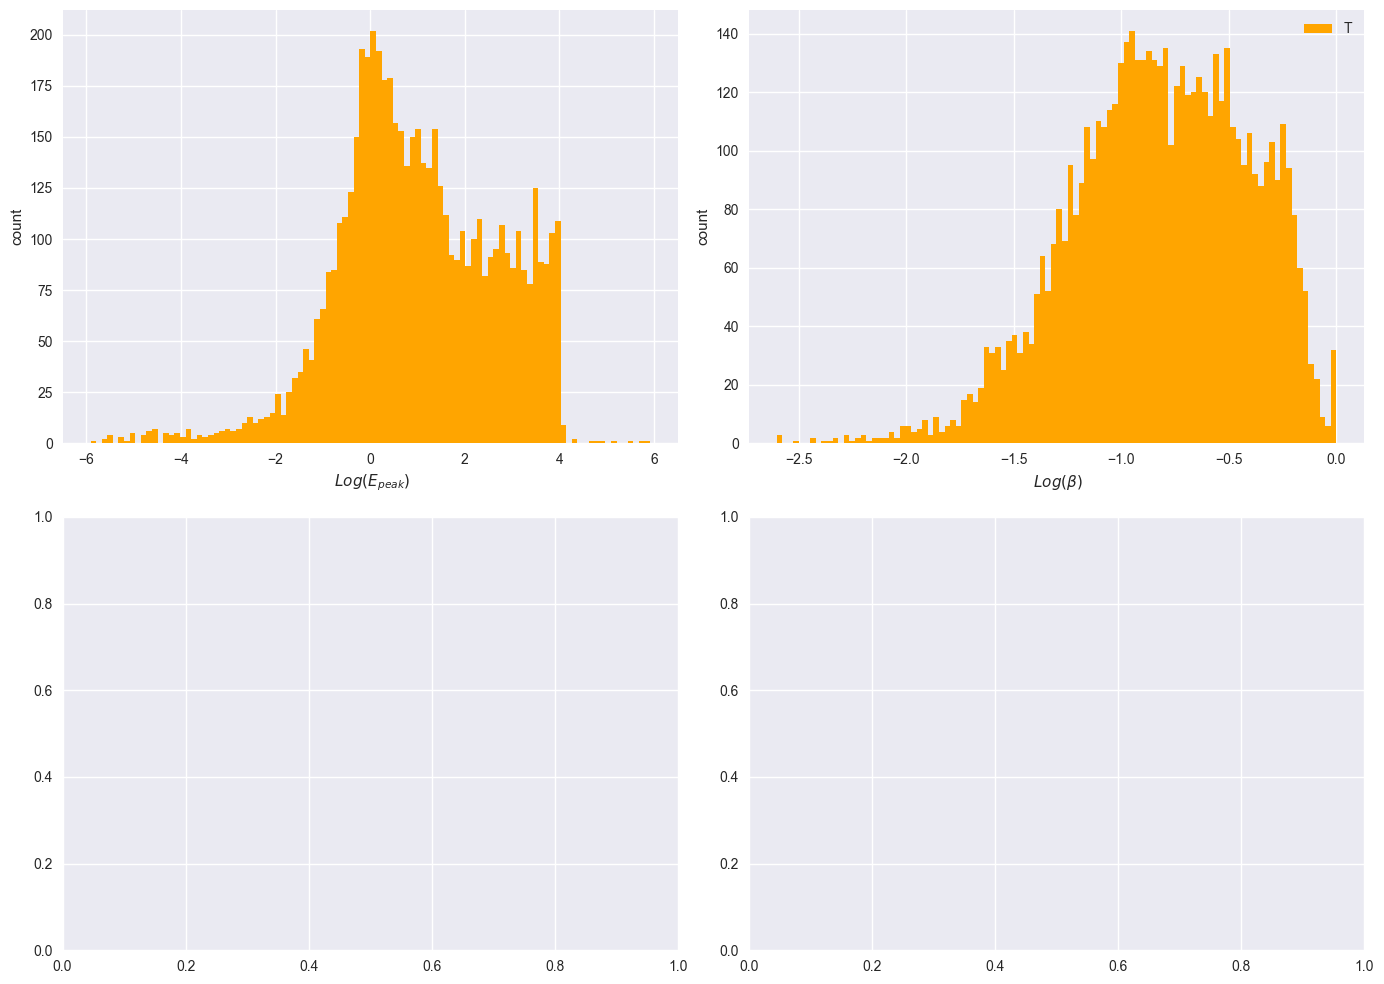

In [177]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

"""
ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')
"""

"""
ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')
"""

fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [178]:
"""
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)
"""

"\nprint('sigma max',10**X_bal_log_Rel_data[:,2].max())\nprint('sigma min',10**X_bal_log_Rel_data[:,2].min())\nprint('log sigma max',X_bal_log_Rel_data[:,2].max())\nprint('log sigma min',X_bal_log_Rel_data[:,2].min())\nnp.log10(100)\n"

In [179]:
# Count the number of instances in each class of the binary label vector Y (0=astro, 1=DM)
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [180]:

X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 2)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [181]:

# Loading and Preprocessing New Data (unids)
unids_3F = np.genfromtxt('../data/unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


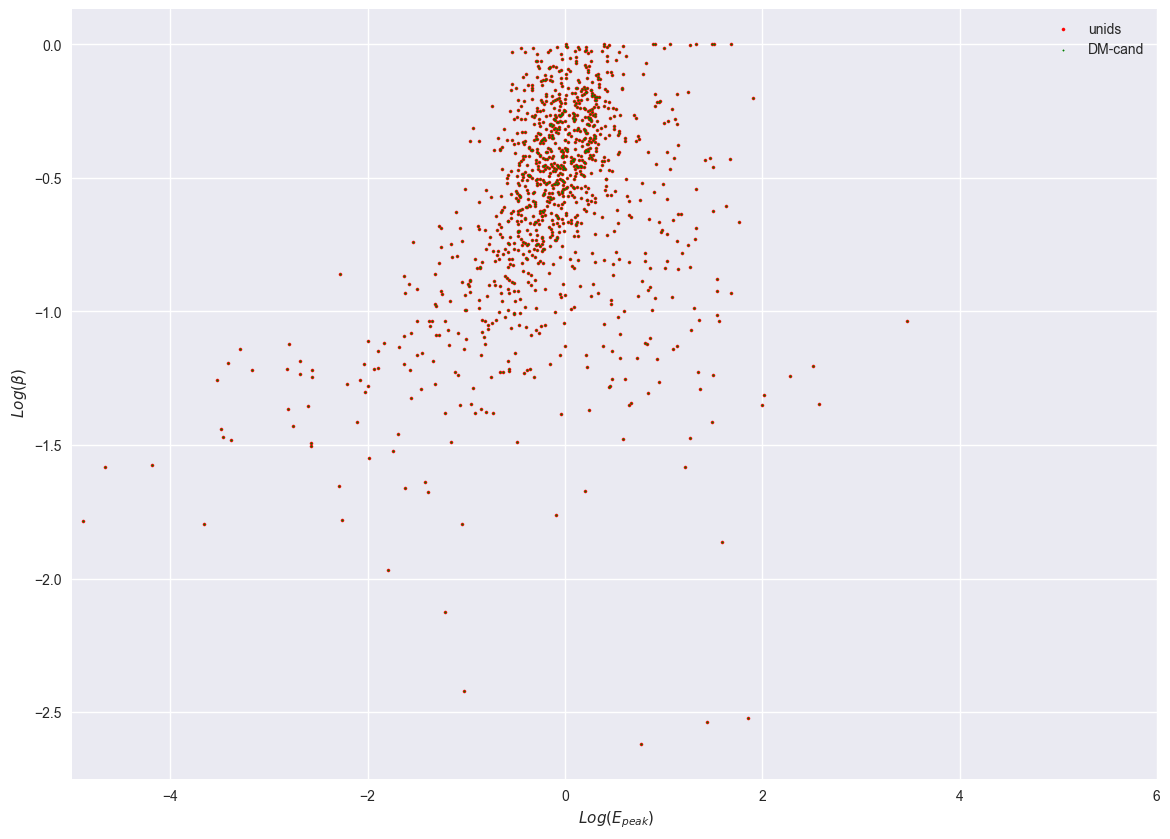

In [182]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [184]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=2
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_2F_21=open("../data/results/ann/2F/unids_DM_std_proba_check_repeated_kfold_2F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_2F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 


"""
------------------------------- Setting Up Cross-Validation -----------------------------------
Splits the data into stratified folds (preserving class ratio) for better generalization
Total 10 splits (5-fold repeated 2 times)
-----------------------------------------------------------------------------------------------
"""
rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)



"""
--------------------------------------- Classifier Setup --------------------------------------
A neural net with:
        - One hidden layer of 21 neurons.
        - ReLU activation.
        - Learning rate of 0.015.
        - 1000 max iterations.
        - Adam optimizer.
        - No L2 regularization (alpha=0.0).
-----------------------------------------------------------------------------------------------
"""
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')



""" 
--------------------------------- Training + Evaluation Loop ----------------------------------
For each cross-validation split:
1. Train-test split based on fold.
2. Standardize the features using StandardScaler (fit on training, transform both).
3. Train the MLP (ANN.fit()).
4. Predict:
        - Binary class predictions (predict()).
        - Class probabilities (predict_proba()).
5. Collect metrics:
        - Accuracy (OA).
        - Confusion matrix:
        - TN (True Negative Rate)
        - TP (True Positive Rate
"""    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        
        "------------------------------------ Predict on Unidentified Sources --------------------------------------"
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        """ 
        For each split, the model is also applied to the unids_log dataset (unlabeled sources),  nd it writes out the probability of being class 1 for each one.
        This provides multiple predictions across different models/splits.

        This writes a file: "unids_DM_std_proba_check_repeated_kfold_2F_21.txt" which contains, for each fold/repeat:
                - Column 0: the unID index (from 0 to N_unids-1)
                - Column 1: the predicted probability of being DM-like from that fold
        """
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_2F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1]))
   

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  

    
unids_DM_std_proba_check_repeated_kfold_2F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()


print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))



rskf RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 2)
X_test_split.shape (1132, 2)


In [185]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(10,)
OA mean 0.858353553373108 OA std 0.015716576786244683
TN mean 0.8615218028056661 TN std 0.04069172331599674
TP mean 0.8551866185552874 TP std 0.04034956274522399
(1125, 2)


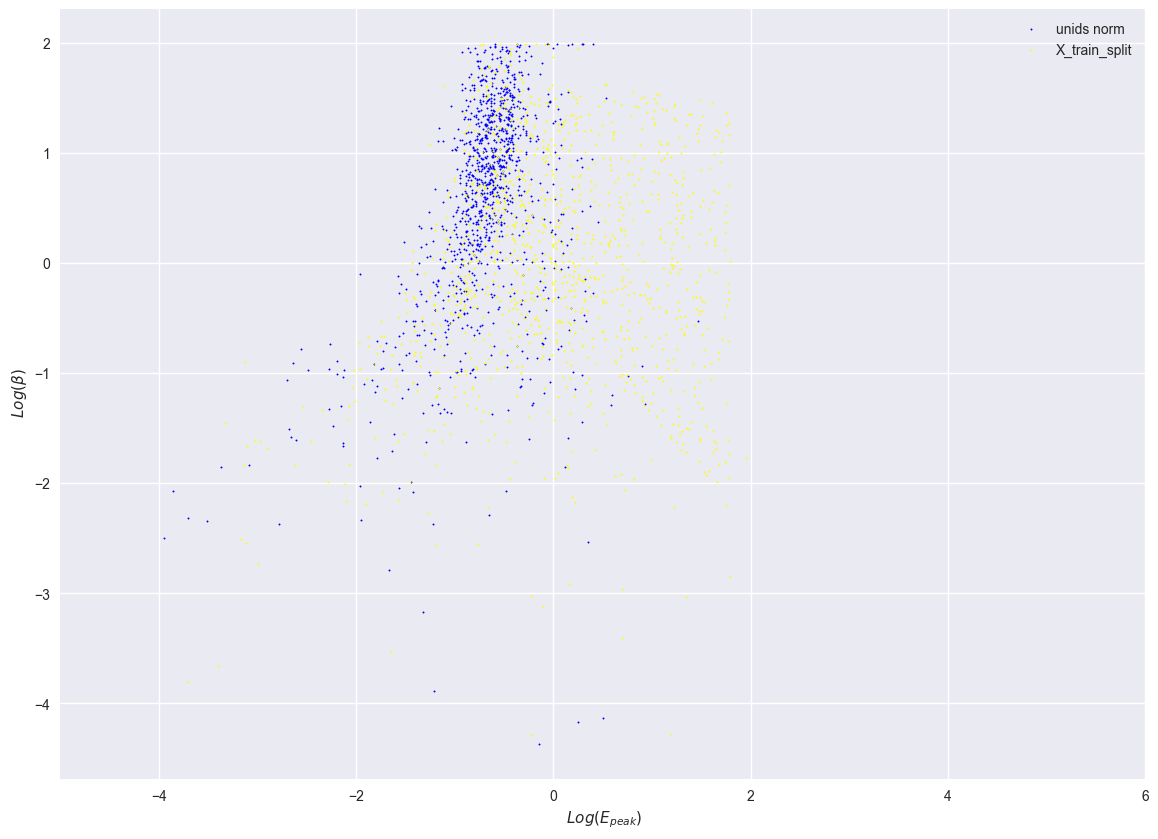

In [186]:
import matplotlib.pyplot as plt

f = plt.figure()
#plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids log',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='unids lin data',s=1)
plt.scatter(unids_std_check[:,0],unids_std_check[:,1], 
          color='blue',label='unids norm',s=1)
plt.scatter(X_test_split_std[:,0],X_test_split_std[:,1], 
          color='yellow',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

In [187]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


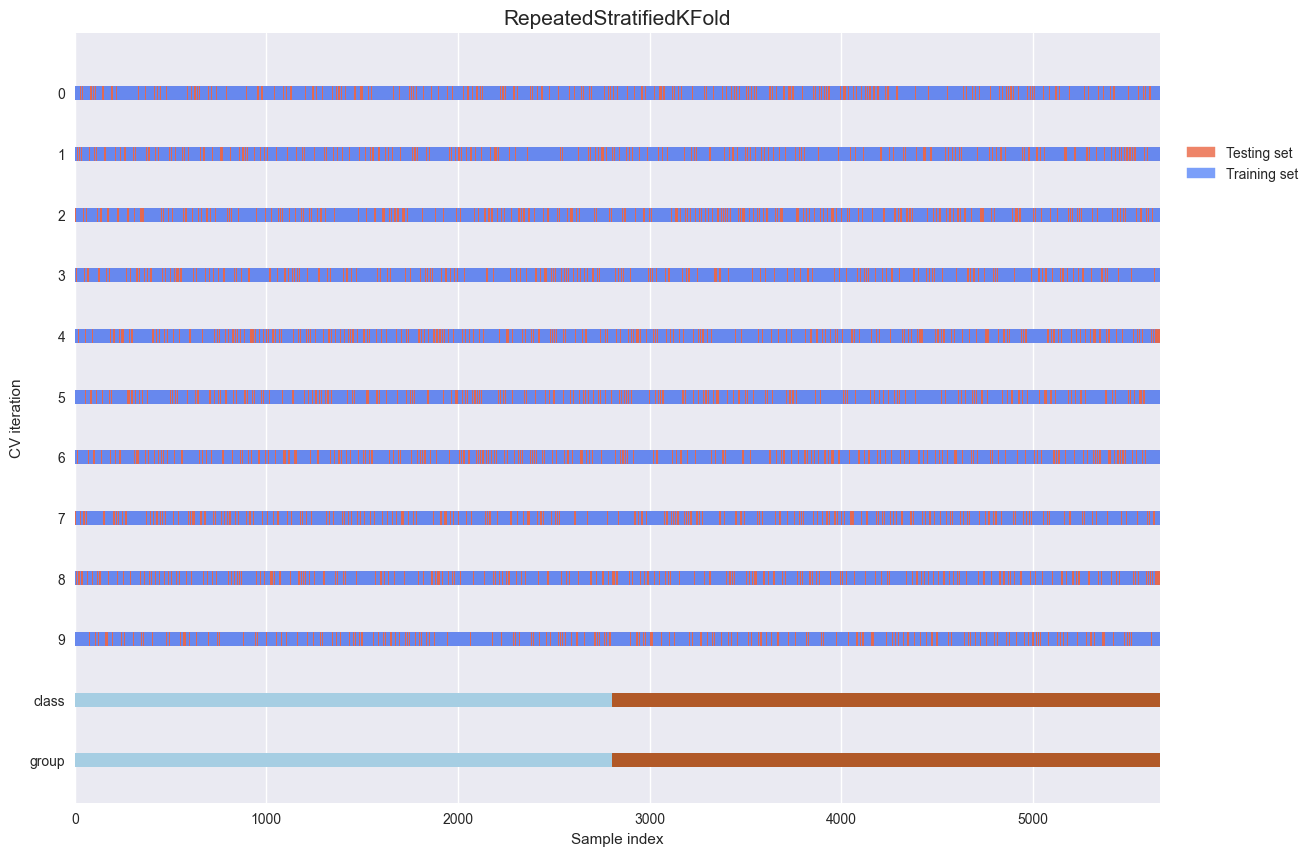

In [188]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

Objective
To compute the mean and standard deviation of predicted probabilities (to be class 1 = DM-like) for each unID source, across multiple runs of the trained classifier (from the previous MLPClassifier code).

In [189]:

# Load unID source data
unids_3F = np.genfromtxt('../data/unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


In [190]:

""" 
Load model prediction outputs
    - Loads the probabilities written during each fold of training.
    - Assumes format: [index, probability] for each unID, per split.
"""
unids_DM_std_proba_repeated_kfold= np.genfromtxt('../data/results/ann/2F/unids_DM_std_proba_check_repeated_kfold_2F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=3

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])


[0.0000000e+00 5.5013556e-11]
[1.         0.39116909]
unids_DM_std_proba_data_repeated_kfold.shape (11250, 2)
[0.0000000e+00 5.5013556e-11]
[1.         0.39116909]
[2.         0.58310278]


In [191]:

#defining an array where each column is the probability to be DM for each unIDs in each split

#defining an array where each column is the probability to be DM for each unIDs in each split

""" 
Extract useful variables
      - N_unids: number of unID sources.
      - N_sample: number of times each unID was evaluated = number of folds × repeats.
"""
N_unids=unids_log.shape[0]
print('N_unids',N_unids)

#N_splits=3
#N_Repeats=10

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

""" 
Reshape probability data. Purpose:
      Build a structured array where:
            - First column = unID index
            - Remaining columns = predicted probabilities across each of the N_sample splits
      This assumes the file ordering is consistent and that predictions are block-structured:
            - First N_unids rows = fold 1
            - Second N_unids rows = fold 2
            -  ...
"""
unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 10
(11250, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 11)
[[0.00000000e+00 5.50135560e-11 3.91169092e-01 ... 7.56538607e-11
  3.37536093e-01 7.04317069e-03]
 [1.00000000e+00 1.89659512e-29 1.69180723e-43 ... 1.60919683e-04
  3.93970661e-37 4.93275115e-01]
 [2.00000000e+00 7.64293820e-80 1.18365505e-16 ... 1.09214486e-04
  3.33742691e-07 8.03589919e-01]
 ...
 [1.12200000e+03 2.22088025e-01 4.99054236e-01 ... 6.11512031e-01
  7.83647649e-01 4.88493431e-01]
 [1.12300000e+03 2.77876863e-01 3.49851165e-01 ... 4.01756625e-13
  2.45667235e-14 4.23628111e-01]
 [1.12400000e+03 5.07030593e-01 8.16917882e-73 ... 2.47752262e-11
  3.26711121e-38 4.70417454e-01]]


In [192]:

""" 
Compute statistics
    - unids_mean: average probability of being DM-like across all splits
    - unids_std: standard deviation of that probability — gives a measure of confidence
"""
unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)

""" 
Define Probability Thresholds
    - mean_prob ≥ 0.90 (strong candidate)
    - mean_prob ≥ 0.50 (moderate candidate)
"""
p_cut=0.90
p_cut_50=0.50

unids_mean [0.20359058 0.15488    0.29364121 ... 0.37332561 0.27401668 0.23285091] unids std [0.22364021 0.22697539 0.39035084 ... 0.29344035 0.25798082 0.2487907 ]
(1125,)


In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [194]:

# Configuration and data loading
# Configuration
N_splits = 5
N_Repeats = 2
N_sample = N_splits * N_Repeats

print(f"Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds")

# Load unID source data
unids_3F = np.genfromtxt('../data/unids_3F_beta_err_names.txt', dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::, :], dtype=float)
feature_names = unids_3F[0, :]

print(f"Feature names: {feature_names}")
print(f"UnID data shape: {unids_3F_data.shape}")

# Create log-transformed features (F_peak and beta)
unids_log = np.log10(unids_3F_data[:, [0, 1]])
print(f"Log-transformed features shape: {unids_log.shape}")

Cross-validation setup: 5 splits × 2 repeats = 10 total folds
Feature names: ['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
UnID data shape: (1125, 5)
Log-transformed features shape: (1125, 2)


In [195]:

# Load model prediction outputs
unids_DM_std_proba_repeated_kfold = np.genfromtxt('../data/results/ann/2F/unids_DM_std_proba_check_repeated_kfold_2F_21.txt', dtype='str') 
unids_DM_std_proba_data_repeated_kfold = np.asarray(unids_DM_std_proba_repeated_kfold[1::], dtype=float)

print(f"Predictions data shape: {unids_DM_std_proba_data_repeated_kfold.shape}")
print(f"First few predictions:")
print(unids_DM_std_proba_data_repeated_kfold[:5, :])

# Get number of unidentified sources
N_unids = unids_log.shape[0]
print(f"Number of unidentified sources: {N_unids}")

Predictions data shape: (11250, 2)
First few predictions:
[[0.00000000e+00 5.50135560e-11]
 [1.00000000e+00 3.91169092e-01]
 [2.00000000e+00 5.83102784e-01]
 [3.00000000e+00 3.74954584e-01]
 [4.00000000e+00 3.42100065e-01]]
Number of unidentified sources: 1125


In [196]:

# Extract unID indices from first N_unids rows
unids_number = unids_DM_std_proba_data_repeated_kfold[0:N_unids, 0]
print(f"UnID indices shape: {unids_number.shape}")

# Create probability matrix: rows = unIDs, columns = CV folds + index
unids_DM_std_proba_N_sample_repeated_kfold = np.zeros((N_unids, N_sample + 1))

# Fill in the data
unids_DM_std_proba_N_sample_repeated_kfold[:, 0] = unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)] = np.reshape(
    unids_DM_std_proba_data_repeated_kfold[:, 1], (N_unids, N_sample)
)

print(f"Probability matrix shape: {unids_DM_std_proba_N_sample_repeated_kfold.shape}")
print("First few rows of probability matrix:")
print(unids_DM_std_proba_N_sample_repeated_kfold[:5, :])

UnID indices shape: (1125,)
Probability matrix shape: (1125, 11)
First few rows of probability matrix:
[[0.00000000e+00 5.50135560e-11 3.91169092e-01 5.83102784e-01
  3.74954584e-01 3.42100065e-01 1.91431062e-15 4.70791208e-14
  7.56538607e-11 3.37536093e-01 7.04317069e-03]
 [1.00000000e+00 1.89659512e-29 1.69180723e-43 4.35243728e-01
  1.23747400e-68 5.14704141e-01 6.50471299e-02 4.03690156e-02
  1.60919683e-04 3.93970661e-37 4.93275115e-01]
 [2.00000000e+00 7.64293820e-80 1.18365505e-16 3.85703083e-01
  6.30310821e-02 7.49179622e-01 9.34798887e-01 5.78681396e-65
  1.09214486e-04 3.33742691e-07 8.03589919e-01]
 [3.00000000e+00 5.84695023e-01 8.64807935e-28 3.79900841e-01
  6.50574295e-01 4.14629656e-01 4.87201343e-01 5.63097499e-01
  6.66919970e-21 3.06159847e-01 2.60146676e-27]
 [4.00000000e+00 6.04959992e-01 4.77700700e-01 3.35638695e-01
  7.49520594e-41 9.48438711e-11 8.35046818e-01 2.09441435e-01
  2.85112978e-01 3.17462805e-18 3.52865427e-01]]


Text(0, 0.5, 'count')

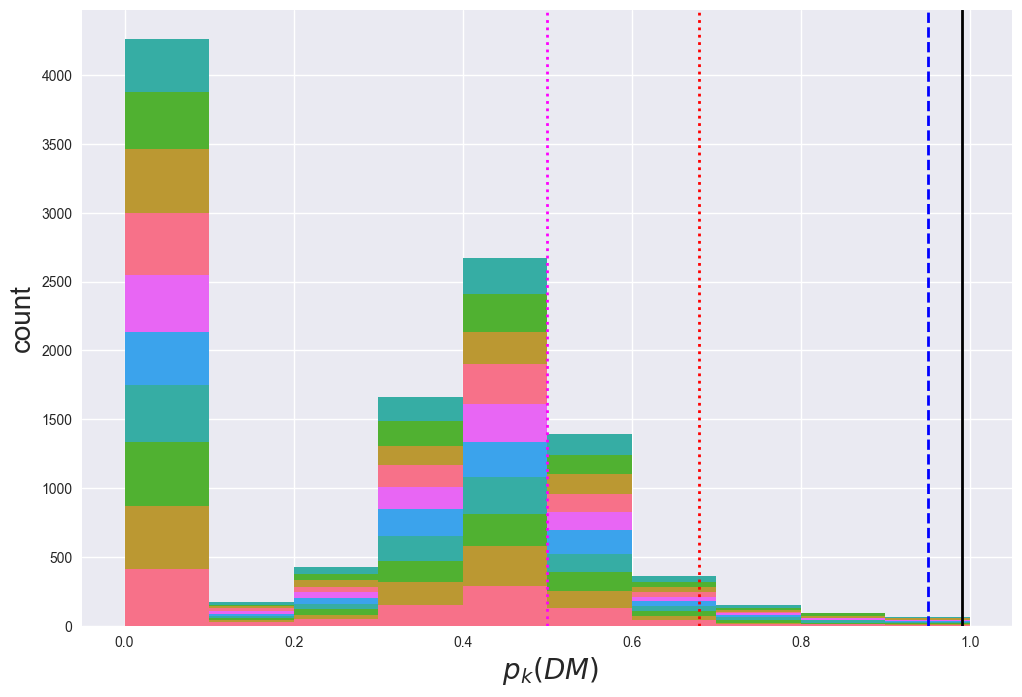

In [197]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()
#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                             bins, histtype='barstacked', density=False)
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)

#fig.savefig("full_histo_2F.pdf", bbox_inches='tight')


In [198]:
"""import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins,histtype='barstacked', density=False, color=all_color[i,:])
#plt.scatter(bins_all[:],counts_all[:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle=':', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 2F$', y=10**(0), x=10**(-0.5), pad=-30)
#plt.yscale('log')

#fig.savefig("full_histo_2F_single_count.pdf", bbox_inches='tight')"""



'import matplotlib.pyplot as plt\n\nfig, axes = plt.subplots(nrows=1, ncols=1)\n#ax0, ax1, ax2 = axes.flatten()\n\nbins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]\n\ncounts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], \n                                         bins,histtype=\'barstacked\', density=False, color=all_color[i,:])\n#plt.scatter(bins_all[:],counts_all[:])\nplt.axvline(0.50, color=\'magenta\', linestyle=\':\', linewidth=1)\nplt.axvline(0.68, color=\'red\', linestyle=\':\', linewidth=1)\nplt.axvline(0.90, color=\'blue\', linestyle=\'--\', linewidth=1)\nplt.axvline(0.95, color=\'black\', linestyle=\'--\', linewidth=1)\nplt.axvline(0.99, color=\'gray\', linestyle=\'--\', linewidth=1)\n#plt.axvline(value_unID, color=\'k\', linestyle=\'-\', linewidth=1)\n#plt.axvline(unids_std.all(), color=\'green\', linestyle=\'-\', linewidth=1)\n#plt.axvline(unids_std.all(), color=\'green\', linestyle=\'--\', linewidth=1)\n\nplt.xlabel(r\' $p

In [199]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 10)
1125
(1125, 10)
[['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']]


# TFG Marta - Additional analysis 2F

In [200]:

# Extract probability data (excluding index column)
prob_data = unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)]

unids_mean = prob_data.mean(axis=1)              # Media - promedio de probabilidad across all folds
unids_std = prob_data.std(axis=1, ddof=1)        # Desviación estándar - consistencia
unids_median = np.median(prob_data, axis=1)      # Mediana - valor central, robusto a outliers
unids_q25 = np.percentile(prob_data, 25, axis=1) # Cuartil 25
unids_q75 = np.percentile(prob_data, 75, axis=1) # Cuartil 75
unids_min = prob_data.min(axis=1)                # Valor mínimo
unids_max = prob_data.max(axis=1)                # Valor máximo

""" 
Si std es muy alta → El modelo es inconsistente para esa fuente
Si mean es alta → El modelo cree que es un buen candidato a materia oscura
Si median es muy diferente a mean → Hay valores extremos
"""
unids_q25 = np.percentile(prob_data, 25, axis=1) # Cuartil 25 - 25% de los valores son menores
unids_q75 = np.percentile(prob_data, 75, axis=1) # Cuartil 75 - 75% de los valores son menores
unids_min = prob_data.min(axis=1) # Valor mínimo - el más bajo
unids_max = prob_data.max(axis=1) # Valor máximo - el más alto

unids_iqr = unids_q75 - unids_q25               # Rango intercuartílico - robustez
unids_cv = unids_std / (unids_mean + 1e-8)      # Coeficiente de variación - consistencia relativa
unids_skew = stats.skew(prob_data, axis=1)      # Asimetría de la distribución
unids_range = unids_max - unids_min             # Rango total

print(f"Total sources analyzed: {len(unids_mean)}")
print(f"Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}")
print(f"Mean uncertainty (std): {unids_std.mean():.4f} ± {unids_std.std():.4f}")
print(f"Median probability: {np.median(unids_mean):.4f}")
print(f"Mean coefficient of variation: {unids_cv.mean():.4f}")
print(f"Sources with CV < 0.2 (low variability): {np.sum(unids_cv < 0.2)}")


Total sources analyzed: 1125
Mean probability: 0.2828 ± 0.0764
Mean uncertainty (std): 0.2349 ± 0.0504
Median probability: 0.2797
Mean coefficient of variation: 0.9012
Sources with CV < 0.2 (low variability): 4


In [201]:

# Primary thresholds
p_cut_very_high = 0.95      # Very high confidence
p_cut_high = 0.90           # High confidence 
p_cut_moderate = 0.50       # Moderate confidence
uncertainty_threshold = 0.1  # Low uncertainty (std)
consistency_threshold = 0.2  # Low coefficient of variation

# Create masks for different candidate types
very_high_conf_mask = unids_mean >= p_cut_very_high
high_conf_mask = (unids_mean >= p_cut_high) & (unids_mean < p_cut_very_high)
moderate_conf_mask = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
low_uncertainty_mask = unids_std <= uncertainty_threshold
consistent_mask = unids_cv <= consistency_threshold

# Candidatos "premium": alta probabilidad + baja incertidumbre
premium_candidates_mask = (unids_mean >= p_cut_high) & (unids_std <= uncertainty_threshold)
# Candidatos "estables": consistencia alta (bajo CV) independiente de probabilidad
stable_candidates_mask = unids_cv <= 0.15

# Get indices
very_high_conf_indices = np.where(very_high_conf_mask)[0]
high_conf_indices = np.where(high_conf_mask)[0]
moderate_conf_indices = np.where(moderate_conf_mask)[0]
low_uncertainty_indices = np.where(low_uncertainty_mask)[0]
premium_candidates_indices = np.where(premium_candidates_mask)[0]
stable_candidates_indices = np.where(stable_candidates_mask)[0]

# Report candidate counts
print(f"VERY HIGH CONFIDENCE (≥{p_cut_very_high:.0%}): {len(very_high_conf_indices)}")
print(f"HIGH CONFIDENCE ({p_cut_high:.0%}-{p_cut_very_high:.0%}): {len(high_conf_indices)}")
print(f"MODERATE CONFIDENCE ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)}")
print(f"LOW UNCERTAINTY (std ≤{uncertainty_threshold}): {len(low_uncertainty_indices)}")
print(f"PREMIUM CANDIDATES (high prob + low uncert): {len(premium_candidates_indices)}")
print(f"STABLE CANDIDATES (CV ≤ 0.15): {len(stable_candidates_indices)}")


VERY HIGH CONFIDENCE (≥95%): 0
HIGH CONFIDENCE (90%-95%): 0
MODERATE CONFIDENCE (50%-90%): 3
LOW UNCERTAINTY (std ≤0.1): 6
PREMIUM CANDIDATES (high prob + low uncert): 0
STABLE CANDIDATES (CV ≤ 0.15): 0


In [202]:
if len(very_high_conf_indices) > 0:
    print(f"\nTOP VERY HIGH CONFIDENCE CANDIDATES:")
    for i in very_high_conf_indices[:min(5, len(very_high_conf_indices))]:
        print(f"  Source {i}: p={unids_mean[i]:.4f} ± {unids_std[i]:.4f} (CV={unids_cv[i]:.3f})")

if len(premium_candidates_indices) > 0:
    print(f"\nPREMIUM CANDIDATES (high prob + low uncertainty):")
    for i in premium_candidates_indices[:min(5, len(premium_candidates_indices))]:
        print(f"  Source {i}: p={unids_mean[i]:.4f} ± {unids_std[i]:.4f} (CV={unids_cv[i]:.3f})")


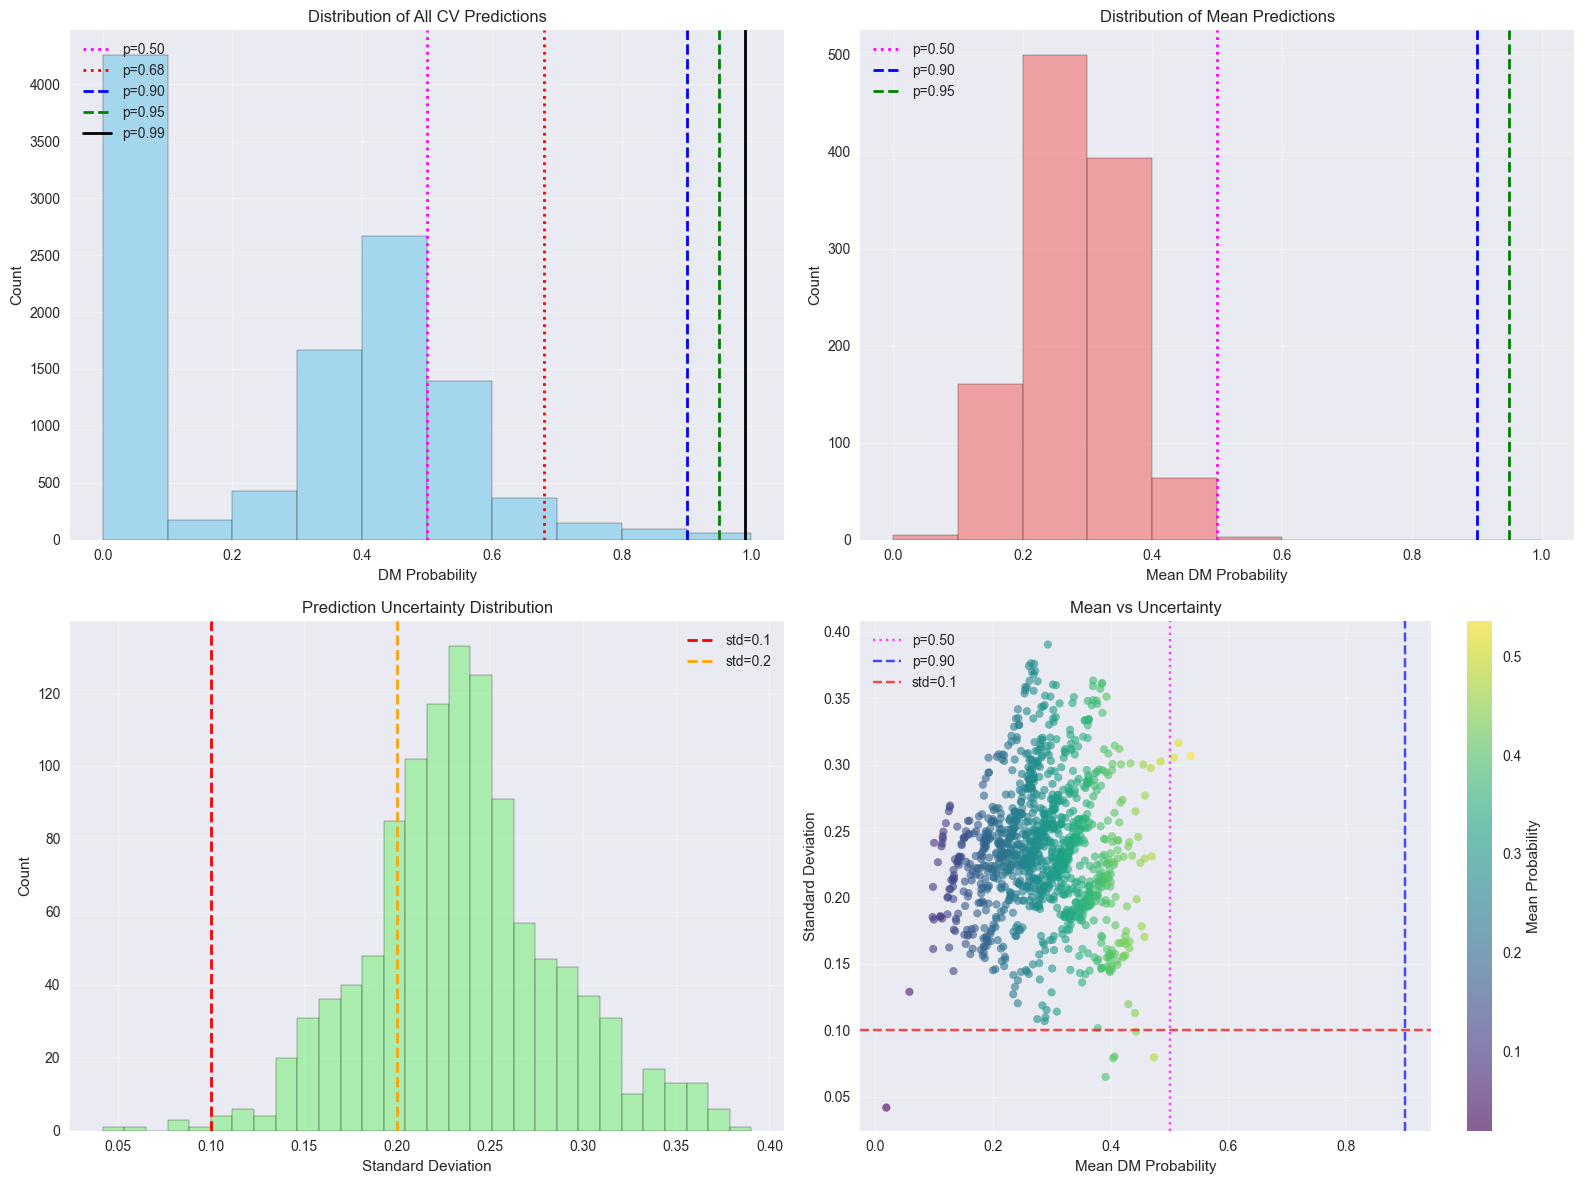

In [203]:
# Create comprehensive probability distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# All predictions histogram (original style)
ax1 = axes[0, 0]
bins = np.arange(0.0, 1.1, 0.1)
counts, bins_edges, _ = ax1.hist(prob_data.flatten(), bins=bins, 
                                alpha=0.7, color='skyblue', edgecolor='black')

ax1.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax1.axvline(0.68, color='red', linestyle=':', linewidth=2, label='p=0.68')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax1.axvline(0.99, color='black', linestyle='-', linewidth=2, label='p=0.99')

ax1.set_xlabel('DM Probability')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of All CV Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Mean probability distribution
ax2 = axes[0, 1]
ax2.hist(unids_mean, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Mean Predictions')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Uncertainty distribution
ax3 = axes[1, 0]
ax3.hist(unids_std, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(0.1, color='red', linestyle='--', linewidth=2, label='std=0.1')
ax3.axvline(0.2, color='orange', linestyle='--', linewidth=2, label='std=0.2')
ax3.set_xlabel('Standard Deviation')
ax3.set_ylabel('Count')
ax3.set_title('Prediction Uncertainty Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Mean vs Std scatter plot
ax4 = axes[1, 1]
scatter = ax4.scatter(unids_mean, unids_std, alpha=0.6, c=unids_mean, 
                     cmap='viridis', s=30)
plt.colorbar(scatter, ax=ax4, label='Mean Probability')
ax4.axvline(0.50, color='magenta', linestyle=':', alpha=0.7, label='p=0.50')
ax4.axvline(0.90, color='blue', linestyle='--', alpha=0.7, label='p=0.90')
ax4.axhline(0.1, color='red', linestyle='--', alpha=0.7, label='std=0.1')
ax4.set_xlabel('Mean DM Probability')
ax4.set_ylabel('Standard Deviation')
ax4.set_title('Mean vs Uncertainty')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

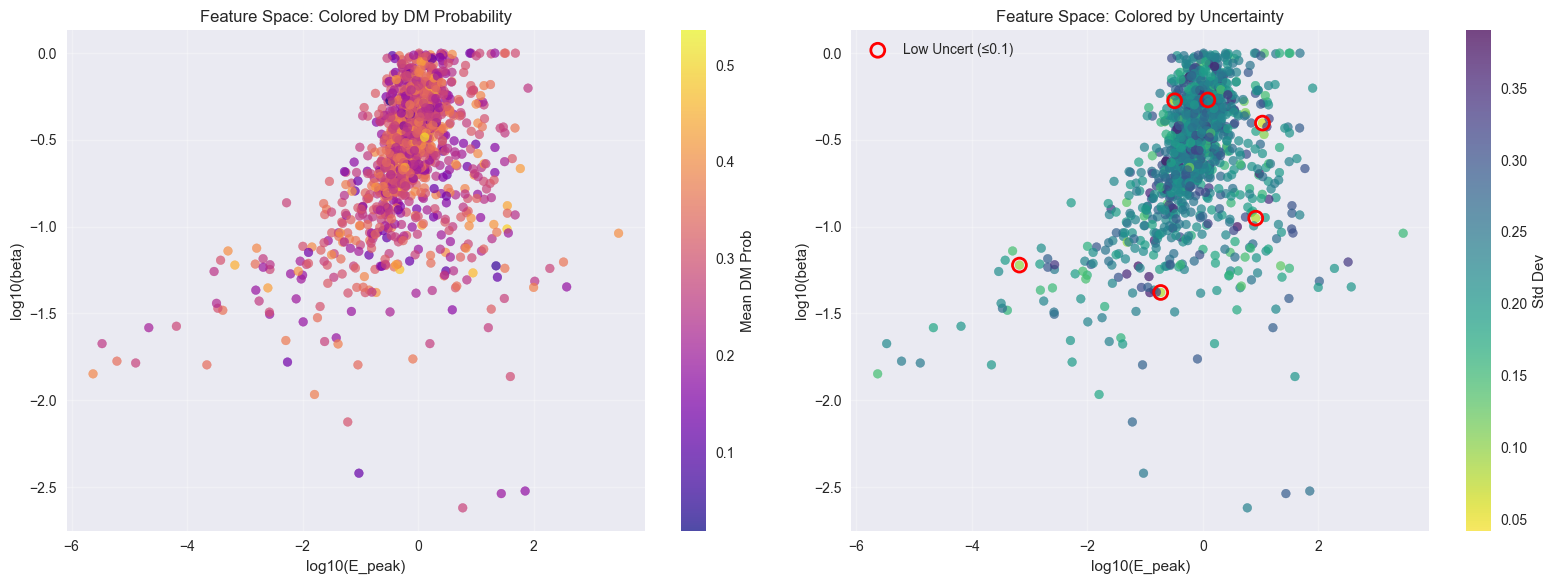

In [204]:
# Feature space analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature space colored by mean probability
ax1 = axes[0]
scatter = ax1.scatter(unids_log[:, 0], unids_log[:, 1], 
                     c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter, ax=ax1, label='Mean DM Prob')
ax1.set_xlabel('log10(E_peak)')
ax1.set_ylabel('log10(beta)')
ax1.set_title('Feature Space: Colored by DM Probability')
ax1.grid(True, alpha=0.3)

# Highlight high confidence candidates
if len(high_conf_indices) > 0:
    ax1.scatter(unids_log[high_conf_indices, 0], unids_log[high_conf_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'High Conf (≥{p_cut_high:.0%})')
    ax1.legend()

# Feature space colored by uncertainty
ax2 = axes[1]
scatter2 = ax2.scatter(unids_log[:, 0], unids_log[:, 1], 
                      c=unids_std, cmap='viridis_r', alpha=0.7, s=40)
plt.colorbar(scatter2, ax=ax2, label='Std Dev')
ax2.set_xlabel('log10(E_peak)')
ax2.set_ylabel('log10(beta)')
ax2.set_title('Feature Space: Colored by Uncertainty')
ax2.grid(True, alpha=0.3)

# Highlight low uncertainty candidates
if len(low_uncertainty_indices) > 0:
    ax2.scatter(unids_log[low_uncertainty_indices, 0], unids_log[low_uncertainty_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'Low Uncert (≤{uncertainty_threshold})')
    ax2.legend()

plt.tight_layout()
plt.show()


In [205]:

# Top candidates analysis
# Create DataFrame for top candidates
top_20_indices = np.argsort(unids_mean)[-20:]  # Top 20 by mean probability
top_candidates_df = pd.DataFrame({
    'Source_ID': top_20_indices,
    'Mean_Prob': unids_mean[top_20_indices],
    'Std_Dev': unids_std[top_20_indices],
    'Median_Prob': unids_median[top_20_indices],
    'Min_Prob': unids_min[top_20_indices],
    'Max_Prob': unids_max[top_20_indices],
    'E_peak': unids_3F_data[top_20_indices, 0],
    'Beta': unids_3F_data[top_20_indices, 1],
    'log_E_peak': unids_log[top_20_indices, 0],
    'log_Beta': unids_log[top_20_indices, 1]
})

# Sort by mean probability (descending)
top_candidates_df = top_candidates_df.sort_values('Mean_Prob', ascending=False)
top_candidates_df = top_candidates_df.reset_index(drop=True)

print("TOP 20 DARK MATTER CANDIDATES:")
display(top_candidates_df.round(4))


TOP 20 DARK MATTER CANDIDATES:


,Source_ID,Mean_Prob,Std_Dev,Median_Prob,Min_Prob,Max_Prob,E_peak,Beta,log_E_peak,log_Beta
0,889,0.5357,0.3064,0.5727,0.0000,0.8861,2.0126,0.6167,0.3038,-0.2099
1,551,0.5151,0.3163,0.5598,0.0000,0.9385,1.2094,0.2911,0.0826,-0.5360
2,1114,0.5077,0.3053,0.5371,0.0000,0.9073,1.2945,0.3280,0.1121,-0.4841
3,326,0.4849,0.3024,0.4916,0.0000,0.9333,34.5790,0.0970,1.5388,-1.0132
4,546,0.4737,0.0797,0.5009,0.3771,0.5669,1.2265,0.5375,0.0887,-0.2696
5,888,0.4695,0.2310,0.4890,0.0000,0.9175,0.4799,0.0567,-0.3188,-1.2464
6,560,0.4683,0.2974,0.5390,0.0000,0.8809,1.4393,0.3499,0.1582,-0.4561
7,552,0.4583,0.2767,0.5497,0.0000,0.9002,0.6068,0.2390,-0.2169,-0.6216
8,1113,0.4579,0.2294,0.4318,0.0000,0.9114,8.8902,0.0542,0.9489,-1.2660
9,536,0.4574,0.1703,0.5257,0.0000,0.5586,0.7394,0.3503,-0.1311,-0.4556


In [207]:

# Create complete results DataFrame
results_df = pd.DataFrame({
    'Source_ID': range(N_unids),
    'Mean_Prob': unids_mean,
    'Std_Dev': unids_std,
    'Median_Prob': unids_median,
    'Q25_Prob': unids_q25,
    'Q75_Prob': unids_q75,
    'Min_Prob': unids_min,
    'Max_Prob': unids_max,
    'E_peak': unids_3F_data[:, 0],
    'Beta': unids_3F_data[:, 1],
    'log_E_peak': unids_log[:, 0],
    'log_Beta': unids_log[:, 1]
})

# Add candidate classification flags
results_df['Very_High_Conf'] = unids_mean >= 0.95
results_df['High_Conf'] = (unids_mean >= p_cut_high) & (unids_mean < 0.95)
results_df['Moderate_Conf'] = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
results_df['Low_Uncertainty'] = unids_std <= uncertainty_threshold

# Sort by mean probability
results_df = results_df.sort_values('Mean_Prob', ascending=False).reset_index(drop=True)

# Save results
results_df.to_csv('../data/results/ANN/2F/unid_dm_analysis_complete_results_2F_run3.csv', index=False)
print(f"Complete results saved to '../data/results/ANN/2F/unid_dm_analysis_complete_results_2F.csv'")
print(f"Total sources analyzed: {len(results_df)}")

# Display summary by category
print("\nSUMMARY BY CANDIDATE CATEGORY:")
categories = ['Very_High_Conf', 'High_Conf', 'Moderate_Conf', 'Low_Uncertainty']
for cat in categories:
    count = results_df[cat].sum()
    if count > 0:
        mean_prob = results_df[results_df[cat]]['Mean_Prob'].mean()
        mean_uncert = results_df[results_df[cat]]['Std_Dev'].mean()
        print(f"{cat.replace('_', ' ')}: {count} sources (avg prob: {mean_prob:.3f}, avg uncert: {mean_uncert:.3f})")


Complete results saved to '../data/results/ANN/2F/unid_dm_analysis_complete_results_2F.csv'
Total sources analyzed: 1125

SUMMARY BY CANDIDATE CATEGORY:
Moderate Conf: 3 sources (avg prob: 0.520, avg uncert: 0.309)
Low Uncertainty: 6 sources (avg prob: 0.356, avg uncert: 0.074)


In [208]:
# Generar reporte
report_content = f"""
{'='*80}
REPORTE DE ANÁLISIS DE CANDIDATOS DE MATERIA OSCURA
{'='*80}

PARÁMETROS DEL ANÁLISIS:
- Total de fuentes no identificadas: {N_unids}
- Configuración de validación cruzada: {N_splits} pliegues × {N_Repeats} repeticiones = {N_sample} evaluaciones totales
- Umbral de alta confianza: {p_cut_high:.0%}
- Umbral de confianza moderada: {p_cut_moderate:.0%}
- Umbral de baja incertidumbre: {uncertainty_threshold}

ESTADÍSTICAS GENERALES:
- Probabilidad media: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}
- Probabilidad mediana: {np.median(unids_mean):.4f}
- Incertidumbre media: {unids_std.mean():.4f} ± {unids_std.std():.4f}

RESUMEN DE CANDIDATOS:
- Muy Alta Confianza (≥95%): {len(very_high_conf_indices)} fuentes
- Alta Confianza (≥{p_cut_high:.0%}): {len(high_conf_indices)} fuentes
- Confianza Moderada ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)} fuentes
- Baja Incertidumbre (≤{uncertainty_threshold}): {len(low_uncertainty_indices)} fuentes

TOP 10 CANDIDATOS:
{'-'*50}
"""

for i in range(min(10, len(results_df))):
    row = results_df.iloc[i]
    report_content += f"Fuente {row['Source_ID']:3d}: p={row['Mean_Prob']:.4f}±{row['Std_Dev']:.4f} "
    report_content += f"(E_peak={row['E_peak']:.3e}, beta={row['Beta']:.4f})\n"

# Guardar reporte
with open('../data/results/ann/2F/reporte_candidatos_dm_2F.txt', 'w', encoding='utf-8') as f:
    f.write(report_content)

print("Análisis de ANN 2F completado.")
print("Archivos generados:")
print("- unid_dm_analysis_complete_results_2F.csv")
print("- reporte_candidatos_dm_2F.txt")

# Mostrar resumen final
print(f"\nRESUMEN FINAL:")
print(f"Se analizaron {N_unids} fuentes no identificadas")
print(f"Se encontraron {len(very_high_conf_indices)} candidatos de muy alta confianza (≥95%)")
print(f"Se encontraron {len(high_conf_indices)} candidatos de alta confianza (≥{p_cut_high:.0%})")
print(f"Se identificaron {len(moderate_conf_indices)} candidatos de confianza moderada")
print(f"Se detectaron {len(low_uncertainty_indices)} fuentes con baja incertidumbre")

Análisis de ANN 2F completado.
Archivos generados:
- unid_dm_analysis_complete_results_2F.csv
- reporte_candidatos_dm_2F.txt

RESUMEN FINAL:
Se analizaron 1125 fuentes no identificadas
Se encontraron 0 candidatos de muy alta confianza (≥95%)
Se encontraron 0 candidatos de alta confianza (≥90%)
Se identificaron 3 candidatos de confianza moderada
Se detectaron 6 fuentes con baja incertidumbre


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000'),
  Text(0, 4500.0, '4500')])

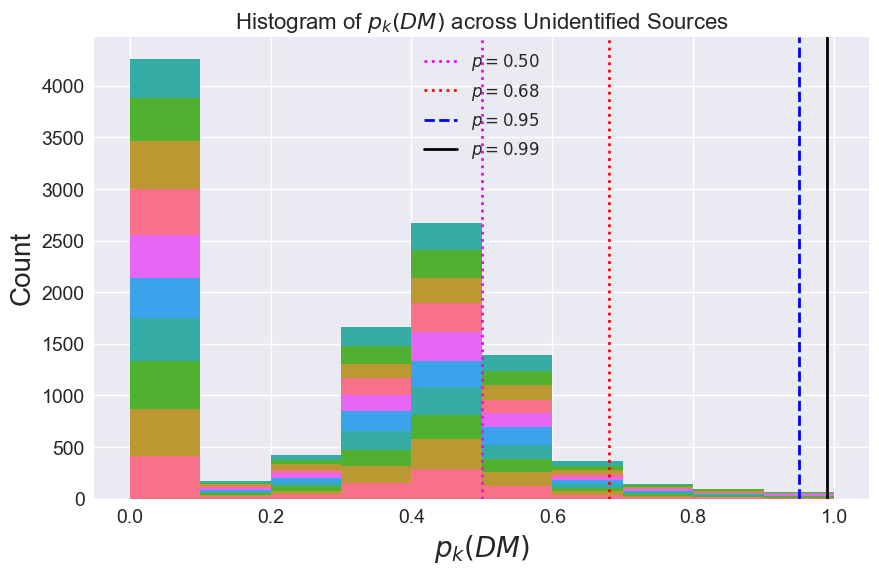

In [209]:
# Histogram
bins = [i/10 for i in range(11)]
fig, ax = plt.subplots(figsize=(10, 6))
counts_all, bins_all, ignored = ax.hist(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)],
                                         bins=bins, histtype='barstacked', density=False)

# Threshold lines
ax.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
ax.axvline(0.68, color='red', linestyle=':', linewidth=2)
ax.axvline(0.95, color='blue', linestyle='--', linewidth=2)
ax.axvline(0.99, color='black', linestyle='-', linewidth=2)

# Labels and title
ax.set_xlabel(r'$p_k(DM)$', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title("Histogram of $p_k(DM)$ across Unidentified Sources", fontsize=16)
ax.legend(["$p = 0.50$", "$p = 0.68$", "$p = 0.95$", "$p = 0.99$"], fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save figure
# fig.savefig(f"full_histo_2F_{datetime.now():%Y%m%d_%H%M%S}.pdf", bbox_inches='tight')


# Análisis de consenso entre 3 diferentes ejecuciones - 2F

In [210]:
from scipy import stats

# Configuración
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 10)

In [211]:

execution_files = [
    '../data/results/ann/2F/unid_dm_analysis_complete_results_2F_run1.csv',
    '../data/results/ann/2F/unid_dm_analysis_complete_results_2F_run2.csv', 
    '../data/results/ann/2F/unid_dm_analysis_complete_results_2F_run3.csv'
]

executions = []
for i, file in enumerate(execution_files, 1):
    df = pd.read_csv(file)
    executions.append(df)
    print(f"Ejecución {i}: {len(df)} fuentes")

# Verificar consistencia
n_sources = len(executions[0])
assert all(len(ex) == n_sources for ex in executions), "Inconsistencia en número de fuentes"
print(f"Verificación exitosa: {n_sources} fuentes en todas las ejecuciones\n")

Ejecución 1: 1125 fuentes
Ejecución 2: 1125 fuentes
Ejecución 3: 1125 fuentes
Verificación exitosa: 1125 fuentes en todas las ejecuciones



In [212]:
consensus_df = pd.DataFrame({
    'Source_ID': executions[0]['Source_ID'].astype(int),
    'E_peak': executions[0]['E_peak'],
    'Beta': executions[0]['Beta'],
    'log_E_peak': executions[0]['log_E_peak'],
    'log_Beta': executions[0]['log_Beta']
})

# Agregar probabilidades de cada ejecución
for i, ex in enumerate(executions, 1):
    consensus_df[f'Prob_Run{i}'] = ex['Mean_Prob']
    consensus_df[f'Std_Run{i}'] = ex['Std_Dev']


In [213]:
prob_cols = ['Prob_Run1', 'Prob_Run2', 'Prob_Run3']
std_cols = ['Std_Run1', 'Std_Run2', 'Std_Run3']

consensus_df['Mean_Consensus'] = consensus_df[prob_cols].mean(axis=1)
consensus_df['Std_Consensus'] = consensus_df[prob_cols].std(axis=1, ddof=1)
consensus_df['Min_Consensus'] = consensus_df[prob_cols].min(axis=1)
consensus_df['Max_Consensus'] = consensus_df[prob_cols].max(axis=1)
consensus_df['Range_Consensus'] = consensus_df['Max_Consensus'] - consensus_df['Min_Consensus']
consensus_df['CV_Consensus'] = consensus_df['Std_Consensus'] / (consensus_df['Mean_Consensus'] + 1e-8)

print("ESTADÍSTICAS GENERALES DEL CONSENSO:")
print(f"Probabilidad media: {consensus_df['Mean_Consensus'].mean():.4f} ± {consensus_df['Mean_Consensus'].std():.4f}")
print(f"Variabilidad promedio entre ejecuciones: {consensus_df['Std_Consensus'].mean():.4f}")
print(f"Coeficiente de variación promedio: {consensus_df['CV_Consensus'].mean():.4f}")

ESTADÍSTICAS GENERALES DEL CONSENSO:
Probabilidad media: 0.2835 ± 0.0767
Variabilidad promedio entre ejecuciones: 0.0071
Coeficiente de variación promedio: 0.0259


In [214]:
from scipy.stats import pearsonr, kendalltau

print(f"\nANÁLISIS DE ESTABILIDAD:")

# Correlaciones entre ejecuciones
correlations = []
corr_pairs = [(0,1), (0,2), (1,2)]
for i, j in corr_pairs:
    r, p = pearsonr(consensus_df[f'Prob_Run{i+1}'], consensus_df[f'Prob_Run{j+1}'])
    correlations.append(r)
    print(f"Correlación Run{i+1}-Run{j+1}: {r:.4f} (p={p:.2e})")

mean_correlation = np.mean(correlations)
print(f"Correlación promedio: {mean_correlation:.4f}")

# Concordancia de rankings (top 100 para eficiencia)
rankings = []
for i, ex in enumerate(executions):
    rank = ex.sort_values('Mean_Prob', ascending=False)['Source_ID'].values
    rankings.append(rank)

top_n = min(100, n_sources)
tau_values = []
for i, j in corr_pairs:
    tau, p = kendalltau(rankings[i][:top_n], rankings[j][:top_n])
    tau_values.append(tau)

mean_tau = np.mean(tau_values)
print(f"Concordancia de rankings (Kendall's τ): {mean_tau:.4f}")


ANÁLISIS DE ESTABILIDAD:
Correlación Run1-Run2: 0.9988 (p=0.00e+00)
Correlación Run1-Run3: 0.9989 (p=0.00e+00)
Correlación Run2-Run3: 0.9988 (p=0.00e+00)
Correlación promedio: 0.9988
Concordancia de rankings (Kendall's τ): -0.0093


In [215]:
print(f"\nIDENTIFICACIÓN DE CANDIDATOS ROBUSTOS:")

# Definir criterios simplificados
STABILITY_THRESHOLD = 0.10  # Baja variabilidad entre ejecuciones
MIN_PROB_THRESHOLD = 0.40   # Probabilidad mínima aceptable
MEAN_PROB_THRESHOLD = 0.45  # Probabilidad media mínima

# Candidatos estables (baja variabilidad)
stable_mask = consensus_df['Std_Consensus'] <= STABILITY_THRESHOLD
stable_candidates = consensus_df[stable_mask]

# Candidatos robustos (criterios múltiples)
robust_mask = (
    (consensus_df['Min_Consensus'] >= MIN_PROB_THRESHOLD) &
    (consensus_df['Mean_Consensus'] >= MEAN_PROB_THRESHOLD) &
    (consensus_df['Std_Consensus'] <= STABILITY_THRESHOLD)
)
robust_candidates = consensus_df[robust_mask]

# Análisis de top rankings
top_20_sets = []
for ex in executions:
    top_20 = set(ex.nlargest(20, 'Mean_Prob')['Source_ID'])
    top_20_sets.append(top_20)

# Intersecciones
intersection_all = top_20_sets[0] & top_20_sets[1] & top_20_sets[2]
intersection_2of3 = set()
for i in range(3):
    for j in range(i+1, 3):
        intersection_2of3.update(top_20_sets[i] & top_20_sets[j])

print(f"Candidatos estables (std ≤ {STABILITY_THRESHOLD}): {len(stable_candidates)}")
print(f"Candidatos robustos (criterios múltiples): {len(robust_candidates)}")
print(f"Candidatos en top 20 de todas las ejecuciones: {len(intersection_all)}")
print(f"Candidatos en top 20 de al menos 2 ejecuciones: {len(intersection_2of3)}")



IDENTIFICACIÓN DE CANDIDATOS ROBUSTOS:
Candidatos estables (std ≤ 0.1): 1125
Candidatos robustos (criterios múltiples): 12
Candidatos en top 20 de todas las ejecuciones: 0
Candidatos en top 20 de al menos 2 ejecuciones: 12


In [216]:
consensus_sorted = consensus_df.sort_values('Mean_Consensus', ascending=False).reset_index(drop=True)

print(f"\nTOP 10 CANDIDATOS DE CONSENSO:")
print("Source | Mean±Std | Min-Max | CV   | E_peak   | Beta")
print("-" * 55)

for i in range(min(10, len(consensus_sorted))):
    row = consensus_sorted.iloc[i]
    source_id = int(row['Source_ID'])
    mean_p = row['Mean_Consensus']
    std_p = row['Std_Consensus']
    min_p = row['Min_Consensus']
    max_p = row['Max_Consensus']
    cv = row['CV_Consensus']
    e_peak = row['E_peak']
    beta = row['Beta']
    
    print(f"{source_id:6d} | {mean_p:.3f}±{std_p:.3f} | {min_p:.3f}-{max_p:.3f} | {cv:.3f} | {e_peak:.2e} | {beta:.4f}")



TOP 10 CANDIDATOS DE CONSENSO:
Source | Mean±Std | Min-Max | CV   | E_peak   | Beta
-------------------------------------------------------
   664 | 0.523±0.027 | 0.492-0.542 | 0.052 | 1.50e+00 | 0.4329
  1114 | 0.501±0.027 | 0.470-0.518 | 0.054 | 1.29e+00 | 0.3280
   551 | 0.497±0.028 | 0.466-0.518 | 0.056 | 1.21e+00 | 0.2911
   101 | 0.486±0.027 | 0.459-0.513 | 0.056 | 2.60e-02 | 0.1263
   663 | 0.474±0.022 | 0.452-0.495 | 0.046 | 6.45e-02 | 0.0851
    96 | 0.471±0.021 | 0.450-0.492 | 0.045 | 8.26e+00 | 0.1120
   138 | 0.466±0.016 | 0.449-0.482 | 0.035 | 4.59e-02 | 0.0652
  1113 | 0.460±0.017 | 0.444-0.477 | 0.037 | 8.89e+00 | 0.0542
   560 | 0.457±0.013 | 0.444-0.470 | 0.029 | 1.44e+00 | 0.3499
   127 | 0.455±0.014 | 0.440-0.468 | 0.031 | 4.82e-02 | 0.1380


In [217]:
print(f"\nEVALUACIÓN DE CALIDAD DEL MODELO:")

# Distribución de variabilidades
low_var_pct = (consensus_df['Std_Consensus'] < 0.05).mean() * 100
med_var_pct = ((consensus_df['Std_Consensus'] >= 0.05) & (consensus_df['Std_Consensus'] < 0.15)).mean() * 100
high_var_pct = (consensus_df['Std_Consensus'] >= 0.15).mean() * 100

print(f"Distribución de variabilidad:")
print(f"  - Baja variabilidad (<0.05): {low_var_pct:.1f}%")
print(f"  - Variabilidad media (0.05-0.15): {med_var_pct:.1f}%") 
print(f"  - Alta variabilidad (≥0.15): {high_var_pct:.1f}%")

# Interpretación de estabilidad
if mean_correlation > 0.8:
    stability_level = "ALTA"
elif mean_correlation > 0.6:
    stability_level = "MODERADA"
else:
    stability_level = "BAJA"

print(f"\nESTABILIDAD DEL MODELO: {stability_level}")
print(f"  - Correlación promedio: {mean_correlation:.3f}")
print(f"  - Concordancia de rankings: {mean_tau:.3f}")
print(f"  - Candidatos estables identificados: {len(stable_candidates)}")


EVALUACIÓN DE CALIDAD DEL MODELO:
Distribución de variabilidad:
  - Baja variabilidad (<0.05): 100.0%
  - Variabilidad media (0.05-0.15): 0.0%
  - Alta variabilidad (≥0.15): 0.0%

ESTABILIDAD DEL MODELO: ALTA
  - Correlación promedio: 0.999
  - Concordancia de rankings: -0.009
  - Candidatos estables identificados: 1125


In [218]:
output_file = '../data/results/ann/2F/consensus_analysis_ann_2f_improved.csv'
consensus_sorted.to_csv(output_file, index=False)

print(f"\nResultados guardados en: {output_file}")
print(f"Análisis de consenso completado exitosamente")

# Retornar métricas clave para uso posterior
consensus_metrics = {
    'mean_correlation': mean_correlation,
    'mean_tau': mean_tau,
    'n_stable_candidates': len(stable_candidates),
    'n_robust_candidates': len(robust_candidates),
    'n_top20_all_runs': len(intersection_all),
    'stability_level': stability_level
}

print(f"\nRESUMEN EJECUTIVO:")
print(f"Modelo con estabilidad {stability_level.lower()} (r={mean_correlation:.3f})")
print(f"Se identificaron {len(robust_candidates)} candidatos robustos para validación con OCSVM")


Resultados guardados en: ../data/results/ann/2F/consensus_analysis_ann_2f_improved.csv
Análisis de consenso completado exitosamente

RESUMEN EJECUTIVO:
Modelo con estabilidad alta (r=0.999)
Se identificaron 12 candidatos robustos para validación con OCSVM
